In [107]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
# Machine learning
import sklearn
from sklearn.model_selection import train_test_split

from sklearn import linear_model
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import cross_val_score

 # KNN
from sklearn.neighbors import KNeighborsClassifier


from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import make_scorer

# Supervised Learning
from sklearn import linear_model, metrics, preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV

# Naive
from sklearn.naive_bayes import GaussianNB

#decision_tree

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier




In [108]:
df = pd.read_csv(r"C:\Users\hentz\Projects\Hen_Liz_DS_Project\games_df.csv")

df.drop(['Unnamed: 0','total_sales'],axis=1, inplace = True)
df

,name,developer,platform,genre,na_sales,eu_sales,japan_sales,other_sales,release_year
0,Just Dance 4,Ubisoft,Wii,Music,4.05,2.21,0.01,0.62,2012
1,Just Dance 2014,Ubisoft Paris,Wii,Music,1.91,1.66,0.01,0.33,2013
2,Just Dance 2015,Ubisoft Paris,Wii,Music,1.00,0.91,0.01,0.18,2014
3,Dance Central 2,Harmonix Music Systems,X360,Music,1.45,0.41,0.01,0.16,2011
4,Guitar Hero Live,FreeStyleGames,PS4,Music,0.52,0.49,0.01,0.20,2015
...,...,...,...,...,...,...,...,...,...
18744,Daredevil,Griptonite Games,GBA,Action,0.00,0.00,0.01,0.01,2003
18745,Silent Hill: Homecoming,Double Helix Games,PC,Action,0.01,0.00,0.01,0.00,2008
18746,Hulk,Radical Entertainment,PC,Action,0.01,0.00,0.01,0.01,2003
18747,Of Orcs and Men,Cyanide Studio,X360,Action,0.01,0.00,0.01,0.01,2012


In [109]:
column_names_to_normalize = ['other_sales','na_sales', 'eu_sales', 'japan_sales']
min_max_scaler = preprocessing.MinMaxScaler()
x = df[column_names_to_normalize].values
x_scaled = min_max_scaler.fit_transform(x)
df_temp = pd.DataFrame(x_scaled, columns=column_names_to_normalize, index = df.index)
df[column_names_to_normalize] = df_temp

platform_type = {'2600':"console",'3DO':"console",'3DS':"handheld",'DC':"console",'DS':"handheld",
                 'GB':"handheld",'GBA':"handheld",'GBC':"handheld",'GC':"console",'GEN':"console",
                 'GG':"console",'Mob':"handheld",'N64':"console",'NES':"console",'NG':"console",
                 'NS':"handheld",'OSX':"PC",'PC':"PC",'PCE':"console",'PCFX':"console",'PS':"handheld",
                 'PS2':"console",'PS3':"console",'PS4':"console",'PSN':"PC",'PSP':"handheld",'PSV':"handheld",
                 'SAT':"console",'SCD':"handheld",'SNES':"console",'VC':"console",'Wii':"console",
                 'WiiU':"handheld",'WS':"handheld",'WW':"console",'X360':"console",'XB':"console",
                 'XBL':"console",'XOne':"console"}
                


df["platform_type"] = df["platform"].map(lambda x: platform_type[x])

df

,name,developer,platform,genre,na_sales,eu_sales,japan_sales,other_sales,release_year,platform_type
0,Just Dance 4,Ubisoft,Wii,Music,0.414959,0.224365,0.004608,0.198718,2012,console
1,Just Dance 2014,Ubisoft Paris,Wii,Music,0.195697,0.168528,0.004608,0.105769,2013,console
2,Just Dance 2015,Ubisoft Paris,Wii,Music,0.102459,0.092386,0.004608,0.057692,2014,console
3,Dance Central 2,Harmonix Music Systems,X360,Music,0.148566,0.041624,0.004608,0.051282,2011,console
4,Guitar Hero Live,FreeStyleGames,PS4,Music,0.053279,0.049746,0.004608,0.064103,2015,console
...,...,...,...,...,...,...,...,...,...,...
18744,Daredevil,Griptonite Games,GBA,Action,0.000000,0.000000,0.004608,0.003205,2003,handheld
18745,Silent Hill: Homecoming,Double Helix Games,PC,Action,0.001025,0.000000,0.004608,0.000000,2008,PC
18746,Hulk,Radical Entertainment,PC,Action,0.001025,0.000000,0.004608,0.003205,2003,PC
18747,Of Orcs and Men,Cyanide Studio,X360,Action,0.001025,0.000000,0.004608,0.003205,2012,console


In [110]:
df_sales = df.copy()
df_sales.drop(['name','developer','platform','genre','release_year','platform_type'],axis=1, inplace = True)


df['max_region'] = df_sales.idxmax(axis=1)
df

,name,developer,platform,genre,na_sales,eu_sales,japan_sales,other_sales,release_year,platform_type,max_region
0,Just Dance 4,Ubisoft,Wii,Music,0.414959,0.224365,0.004608,0.198718,2012,console,na_sales
1,Just Dance 2014,Ubisoft Paris,Wii,Music,0.195697,0.168528,0.004608,0.105769,2013,console,na_sales
2,Just Dance 2015,Ubisoft Paris,Wii,Music,0.102459,0.092386,0.004608,0.057692,2014,console,na_sales
3,Dance Central 2,Harmonix Music Systems,X360,Music,0.148566,0.041624,0.004608,0.051282,2011,console,na_sales
4,Guitar Hero Live,FreeStyleGames,PS4,Music,0.053279,0.049746,0.004608,0.064103,2015,console,other_sales
...,...,...,...,...,...,...,...,...,...,...,...
18744,Daredevil,Griptonite Games,GBA,Action,0.000000,0.000000,0.004608,0.003205,2003,handheld,japan_sales
18745,Silent Hill: Homecoming,Double Helix Games,PC,Action,0.001025,0.000000,0.004608,0.000000,2008,PC,japan_sales
18746,Hulk,Radical Entertainment,PC,Action,0.001025,0.000000,0.004608,0.003205,2003,PC,japan_sales
18747,Of Orcs and Men,Cyanide Studio,X360,Action,0.001025,0.000000,0.004608,0.003205,2012,console,japan_sales


In [111]:
df['na_sucsses']= (df['max_region'].str.lower() == 'na_sales').astype(int)
df['eu_sucsses']= (df['max_region'].str.lower() == 'eu_sales').astype(int)
df['japan_sucsses']= (df['max_region'].str.lower() == 'japan_sales').astype(int)
df['other_sucsses']= (df['max_region'].str.lower() == 'other_sales').astype(int)
df

,name,developer,platform,genre,na_sales,eu_sales,japan_sales,other_sales,release_year,platform_type,max_region,na_sucsses,eu_sucsses,japan_sucsses,other_sucsses
0,Just Dance 4,Ubisoft,Wii,Music,0.414959,0.224365,0.004608,0.198718,2012,console,na_sales,1,0,0,0
1,Just Dance 2014,Ubisoft Paris,Wii,Music,0.195697,0.168528,0.004608,0.105769,2013,console,na_sales,1,0,0,0
2,Just Dance 2015,Ubisoft Paris,Wii,Music,0.102459,0.092386,0.004608,0.057692,2014,console,na_sales,1,0,0,0
3,Dance Central 2,Harmonix Music Systems,X360,Music,0.148566,0.041624,0.004608,0.051282,2011,console,na_sales,1,0,0,0
4,Guitar Hero Live,FreeStyleGames,PS4,Music,0.053279,0.049746,0.004608,0.064103,2015,console,other_sales,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18744,Daredevil,Griptonite Games,GBA,Action,0.000000,0.000000,0.004608,0.003205,2003,handheld,japan_sales,0,0,1,0
18745,Silent Hill: Homecoming,Double Helix Games,PC,Action,0.001025,0.000000,0.004608,0.000000,2008,PC,japan_sales,0,0,1,0
18746,Hulk,Radical Entertainment,PC,Action,0.001025,0.000000,0.004608,0.003205,2003,PC,japan_sales,0,0,1,0
18747,Of Orcs and Men,Cyanide Studio,X360,Action,0.001025,0.000000,0.004608,0.003205,2012,console,japan_sales,0,0,1,0


In [112]:
df.drop(['platform','name','max_region'],axis=1, inplace = True)

In [113]:
def transfer_str_to_numeric_vals(dataset,str_cols):
    for col in str_cols:
        le = preprocessing.LabelEncoder()
        dataset[col] = le.fit_transform(dataset[col])
    return dataset  

In [114]:
col_to_transferred = ['developer','genre','platform_type']
df = transfer_str_to_numeric_vals(df,col_to_transferred)

In [115]:
df

,developer,genre,na_sales,eu_sales,japan_sales,other_sales,release_year,platform_type,na_sucsses,eu_sucsses,japan_sucsses,other_sucsses
0,2574,7,0.414959,0.224365,0.004608,0.198718,2012,1,1,0,0,0
1,2588,7,0.195697,0.168528,0.004608,0.105769,2013,1,1,0,0,0
2,2588,7,0.102459,0.092386,0.004608,0.057692,2014,1,1,0,0,0
3,1089,7,0.148566,0.041624,0.004608,0.051282,2011,1,1,0,0,0
4,909,7,0.053279,0.049746,0.004608,0.064103,2015,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
18744,1050,0,0.000000,0.000000,0.004608,0.003205,2003,2,0,0,1,0
18745,710,0,0.001025,0.000000,0.004608,0.000000,2008,0,0,0,1,0
18746,1973,0,0.001025,0.000000,0.004608,0.003205,2003,0,0,0,1,0
18747,594,0,0.001025,0.000000,0.004608,0.003205,2012,1,0,0,1,0


## NA Model

In [116]:
df_ml_na = df.copy()
df_ml_na.drop(['eu_sucsses','japan_sucsses','other_sucsses'],axis=1, inplace = True)
df_ml_na

,developer,genre,na_sales,eu_sales,japan_sales,other_sales,release_year,platform_type,na_sucsses
0,2574,7,0.414959,0.224365,0.004608,0.198718,2012,1,1
1,2588,7,0.195697,0.168528,0.004608,0.105769,2013,1,1
2,2588,7,0.102459,0.092386,0.004608,0.057692,2014,1,1
3,1089,7,0.148566,0.041624,0.004608,0.051282,2011,1,1
4,909,7,0.053279,0.049746,0.004608,0.064103,2015,1,0
...,...,...,...,...,...,...,...,...,...
18744,1050,0,0.000000,0.000000,0.004608,0.003205,2003,2,0
18745,710,0,0.001025,0.000000,0.004608,0.000000,2008,0,0
18746,1973,0,0.001025,0.000000,0.004608,0.003205,2003,0,0
18747,594,0,0.001025,0.000000,0.004608,0.003205,2012,1,0


#### splite to train and test

In [117]:
def split_train_and_test(ML,target_col):
    feature_vector = ML.columns[ML.columns != target_col]
    target_feature = target_col

    X = ML[feature_vector]
    y = ML[target_feature]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55)
    return X_train, X_test, y_train, y_test

In [118]:
X_train, X_test, y_train, y_test = split_train_and_test(df_ml_na,'na_sucsses')

In [119]:
# Models

def logistic_regression(X_train, y_train):
    clf = LogisticRegression().fit(X_train, y_train)
    return clf

def KNN(X_train, y_train):
    best_k = find_best_K(X_train, y_train)
    params = {'n_neighbors':best_k}
    clf = KNeighborsClassifier(n_neighbors=params['n_neighbors']).fit(X_train, y_train)
    print("Best K is:",best_k,"\n")
    return clf

def find_best_K(X_train, y_train):
    parameters = {'n_neighbors':[x for x in range(3,20,2)]}
    knn = KNeighborsClassifier()
    clf = GridSearchCV(knn, parameters, scoring=make_scorer(metrics.accuracy_score, greater_is_better=True))
    clf.fit(X_train, y_train)
    best_K = clf.best_params_['n_neighbors']
    return best_K

def decision_tree(X_train, y_train):
    best_max_depth, best_min_samples_split = find_best_decision_tree_params(X_train, y_train)
    params = {'max_depth':best_max_depth, 'min_samples_split':best_min_samples_split}
    clf = DecisionTreeClassifier(max_depth=params['max_depth'],
                                 min_samples_split=params['min_samples_split']).fit(X_train, y_train)
    print("Best max depth is:",best_max_depth,"\n")
    print("Best min samples split:",best_min_samples_split,"\n")
    return clf    
    
def find_best_decision_tree_params(X_train, y_train):
    parameters = {'max_depth':[2,4,6,8,10], 'min_samples_split':[5,10,15,20]}
    dt = tree.DecisionTreeClassifier()
    clf = GridSearchCV(dt,parameters,scoring=make_scorer(metrics.accuracy_score, greater_is_better=True))
    clf.fit(X_train, y_train)
    best_max_depth = clf.best_params_['max_depth']
    best_min_samples_split = clf.best_params_['min_samples_split']
    return best_max_depth, best_min_samples_split

In [120]:
# Display confusion matrix of each model

def evo_met(y_test , y_pred,name):   
    evo = metrics.confusion_matrix(y_test , y_pred)
    df_confusion = pd.DataFrame(evo , index=['Actual Negative','Actual Positive'],columns=['Predicted Negative','Predicted Positive'])
    print("confusion matrix of",name,"is:\n")
    display(df_confusion)

In [121]:
# Scale the data

scaler = StandardScaler()
X_scale_train = scaler.fit_transform(X_train)
X_scale_test = scaler.transform(X_test)

In [122]:
# Lists

category = ['accuracy','precision','recall','f1_score']
machine = ['logistic_regression','KNN','decision_tree']
train = []
test = []


#### logistic_regression

In [123]:
LR_clf = logistic_regression(X_scale_train, y_train)

In [124]:
LR_y_pred_train = LR_clf.predict(X_scale_train)
train.append(round(metrics.accuracy_score(y_train, LR_y_pred_train), 5))
evo_met(y_train, LR_y_pred_train,'logistic regression train')

confusion matrix of logistic regression train is:



,Predicted Negative,Predicted Positive
Actual Negative,8725,192
Actual Positive,672,5410


In [125]:
LR_y_pred_test = LR_clf.predict(X_scale_test)
test.append(round(metrics.accuracy_score(y_test, LR_y_pred_test), 5))
evo_met(y_test, LR_y_pred_test,'logistic regression test')

confusion matrix of logistic regression test is:



,Predicted Negative,Predicted Positive
Actual Negative,2196,44
Actual Positive,188,1322


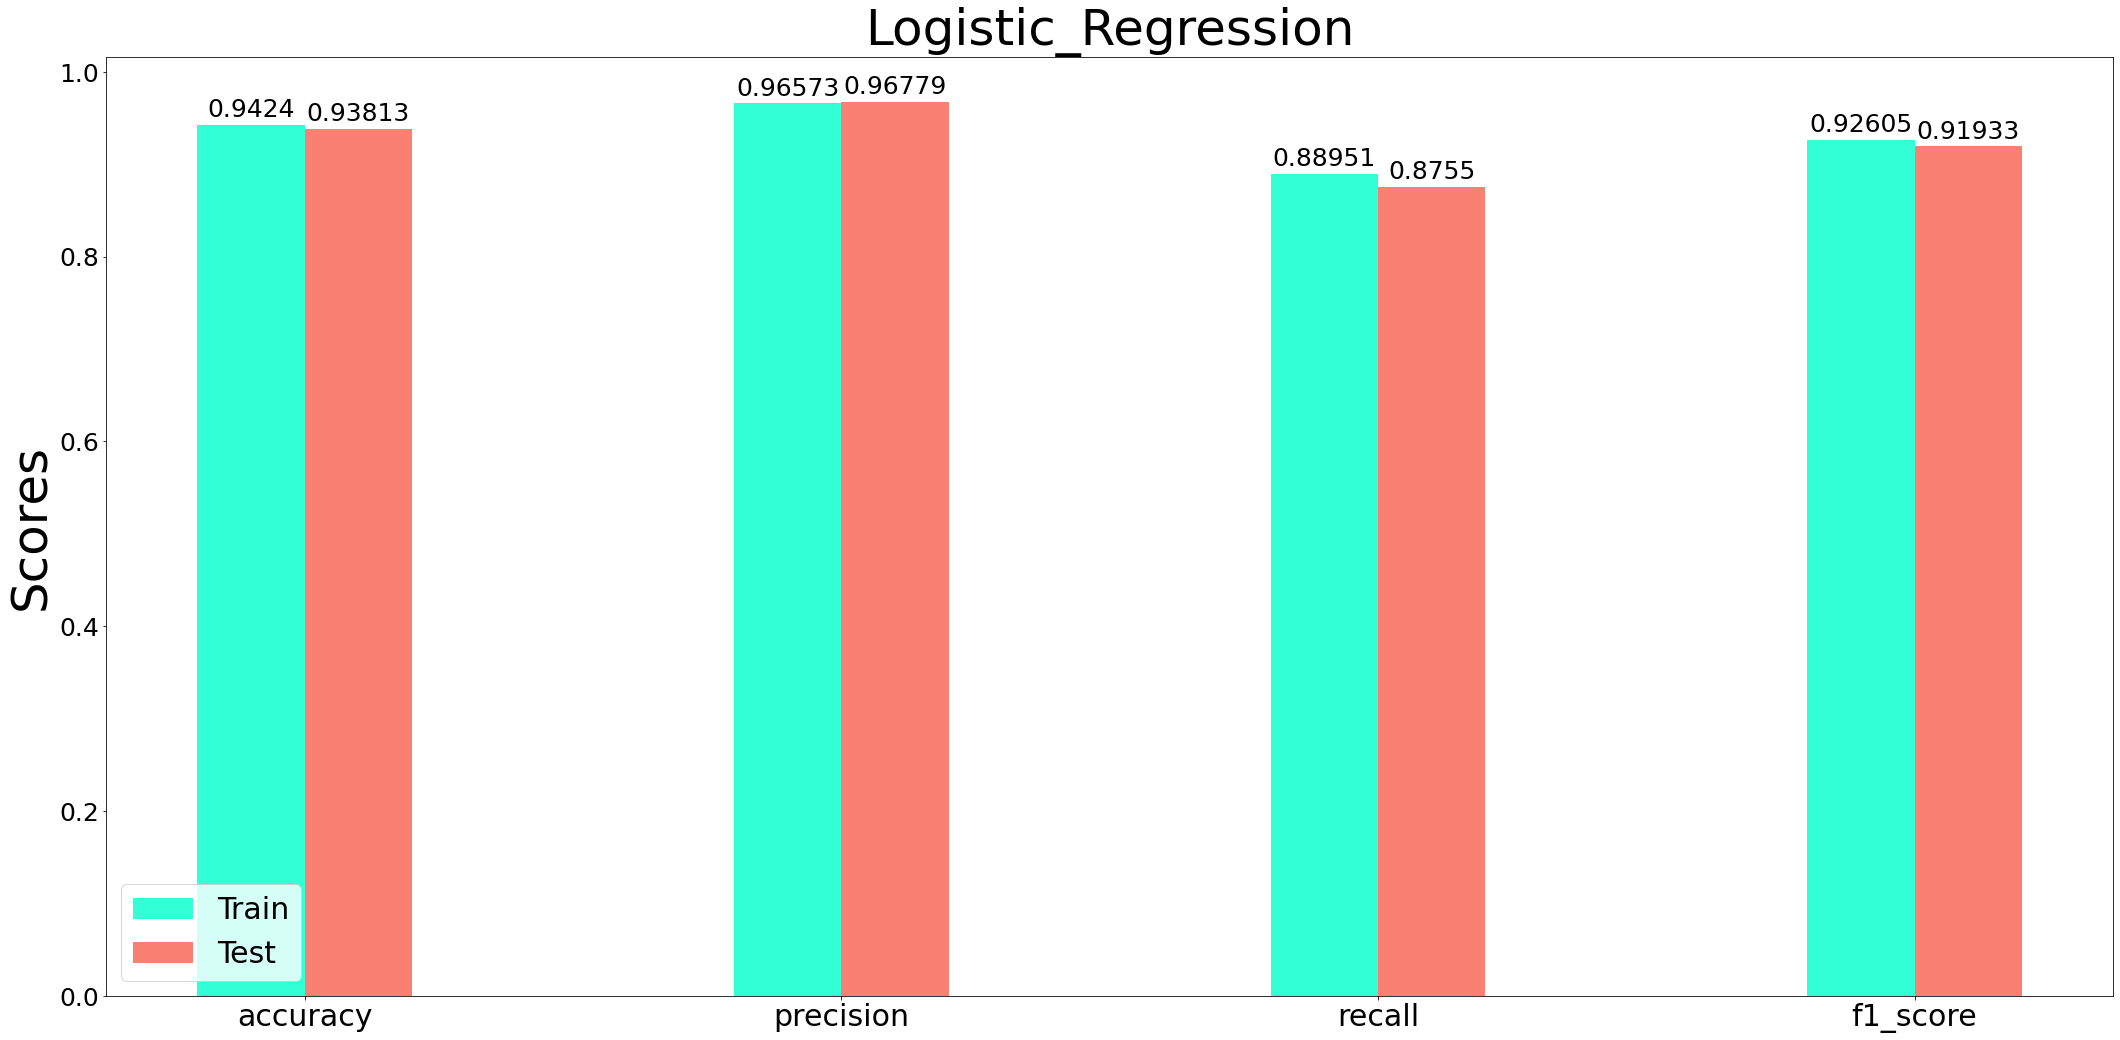

In [126]:

LR_train = []
LR_test = []

# train
LR_train.append(round(metrics.accuracy_score(y_train, LR_y_pred_train), 5))
LR_train.append(round(metrics.precision_score(y_train, LR_y_pred_train), 5))
LR_train.append(round(metrics.recall_score(y_train, LR_y_pred_train), 5))
LR_train.append(round(metrics.f1_score(y_train, LR_y_pred_train), 5))
# test
LR_test.append(round(metrics.accuracy_score(y_test, LR_y_pred_test), 5))
LR_test.append(round(metrics.precision_score(y_test, LR_y_pred_test), 5))
LR_test.append(round(metrics.recall_score(y_test, LR_y_pred_test), 5))
LR_test.append(round(metrics.f1_score(y_test, LR_y_pred_test), 5))
# plot
plotplot(category,LR_train,LR_test,'Logistic_Regression','#33ffd6','salmon')

#### KNN

In [127]:
knn_clf = KNN(X_scale_train, y_train)

Best K is: 3 



In [128]:
knn_y_pred_train = knn_clf.predict(X_scale_train)
train.append(round(metrics.accuracy_score(y_train, knn_y_pred_train), 5))
evo_met(y_train, knn_y_pred_train,'KNN train')

confusion matrix of KNN train is:



,Predicted Negative,Predicted Positive
Actual Negative,8669,248
Actual Positive,218,5864


In [129]:
knn_y_pred_test = knn_clf.predict(X_scale_test)
test.append(round(metrics.accuracy_score(y_test, knn_y_pred_test), 5))
evo_met(y_test, knn_y_pred_test,'KNN test')

confusion matrix of KNN test is:



,Predicted Negative,Predicted Positive
Actual Negative,2099,141
Actual Positive,102,1408


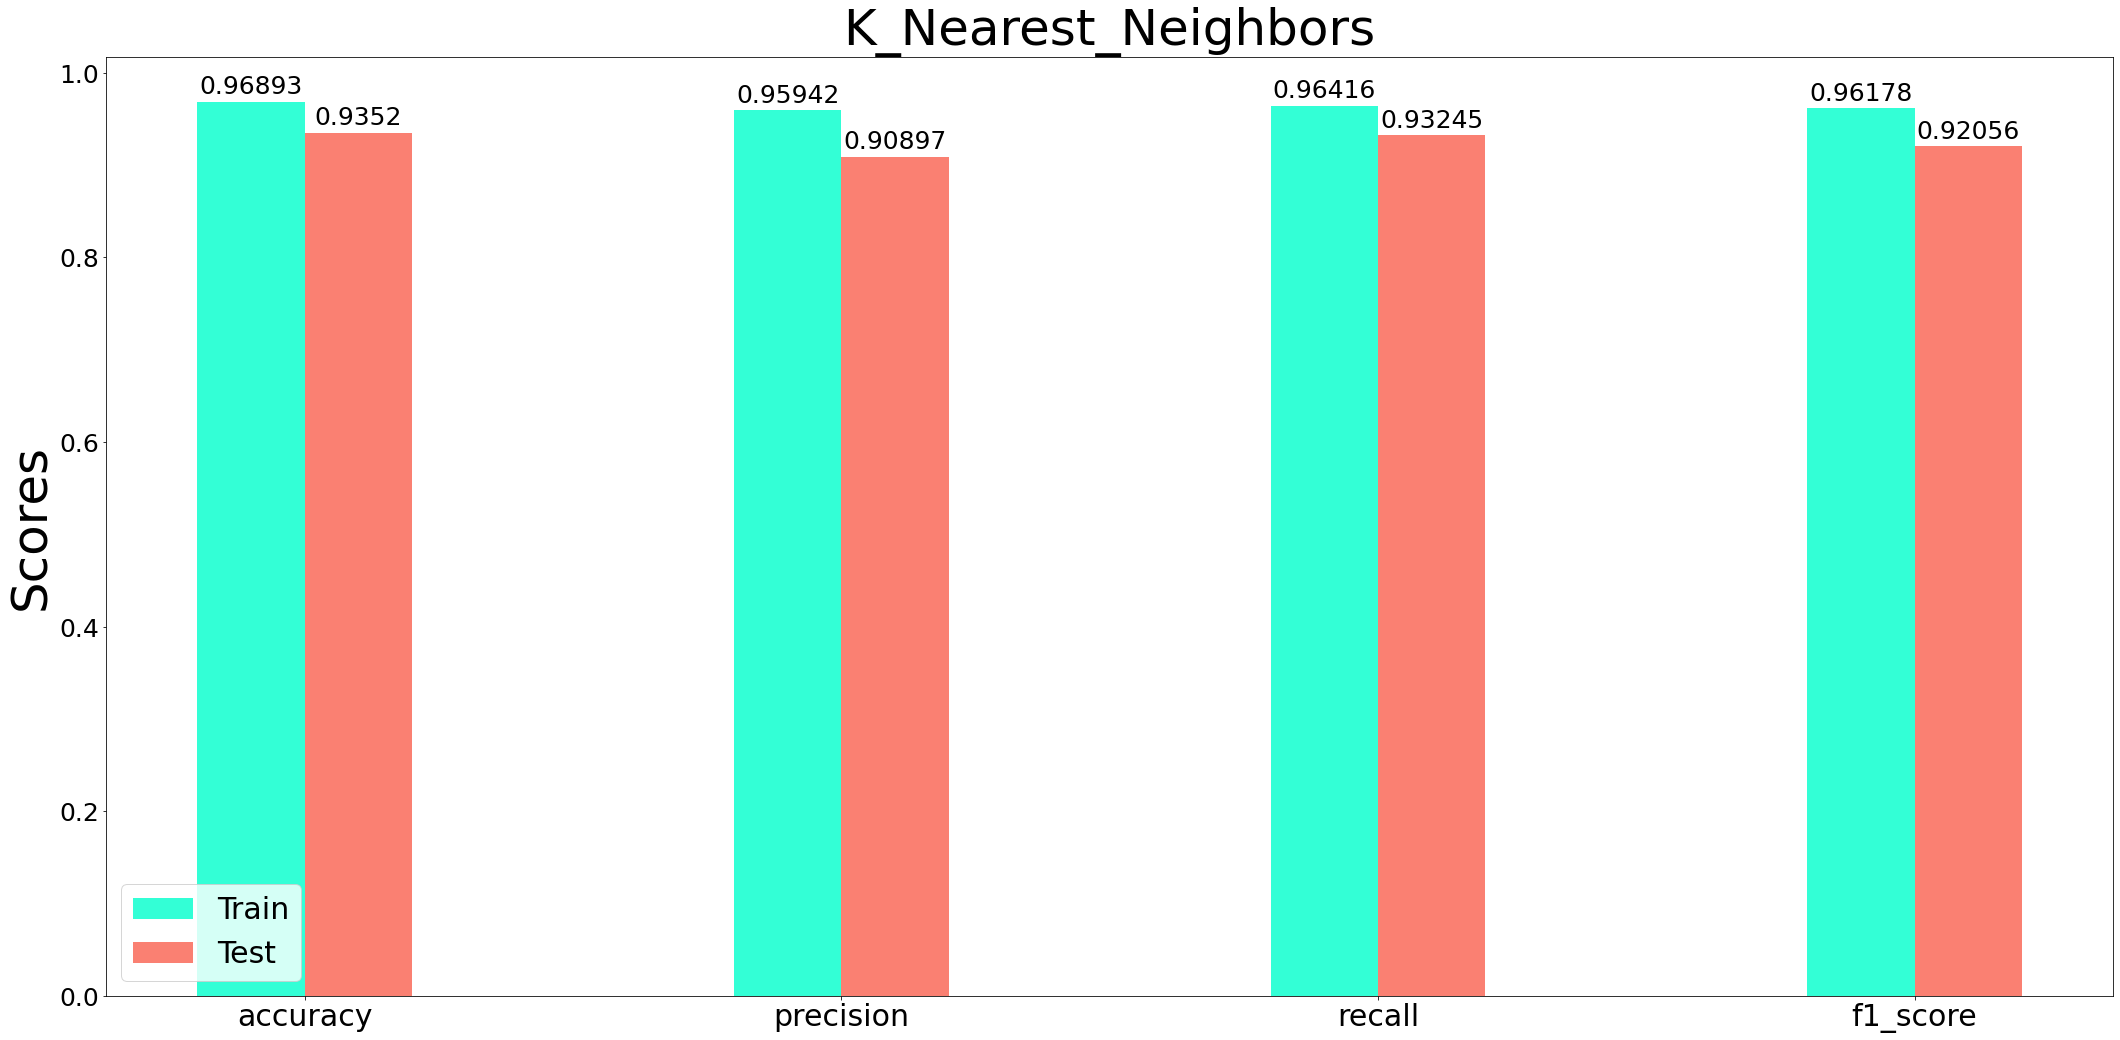

In [130]:
knn_train = []
knn_test = []

# train
knn_train.append(round(metrics.accuracy_score(y_train, knn_y_pred_train), 5))
knn_train.append(round(metrics.precision_score(y_train, knn_y_pred_train), 5))
knn_train.append(round(metrics.recall_score(y_train, knn_y_pred_train), 5))
knn_train.append(round(metrics.f1_score(y_train, knn_y_pred_train), 5))
# test
knn_test.append(round(metrics.accuracy_score(y_test, knn_y_pred_test), 5))
knn_test.append(round(metrics.precision_score(y_test, knn_y_pred_test), 5))
knn_test.append(round(metrics.recall_score(y_test, knn_y_pred_test), 5))
knn_test.append(round(metrics.f1_score(y_test, knn_y_pred_test), 5))
# plot
plotplot(category,knn_train,knn_test,'K_Nearest_Neighbors','#33ffd6','salmon')

##### decision_tree

In [131]:
DT_clf = decision_tree(X_scale_train, y_train)

Best max depth is: 10 

Best min samples split: 10 



In [132]:
DT_y_pred_train = DT_clf.predict(X_scale_train)
train.append(round(metrics.accuracy_score(y_train, DT_y_pred_train), 5))
evo_met(y_train, DT_y_pred_train,'decision tree train')

confusion matrix of decision tree train is:



,Predicted Negative,Predicted Positive
Actual Negative,8846,71
Actual Positive,22,6060


In [133]:
DT_y_pred_test = DT_clf.predict(X_scale_test)
test.append(round(metrics.accuracy_score(y_test, DT_y_pred_test), 5))
evo_met(y_test, DT_y_pred_test,'decision tree test')

confusion matrix of decision tree test is:



,Predicted Negative,Predicted Positive
Actual Negative,2206,34
Actual Positive,16,1494


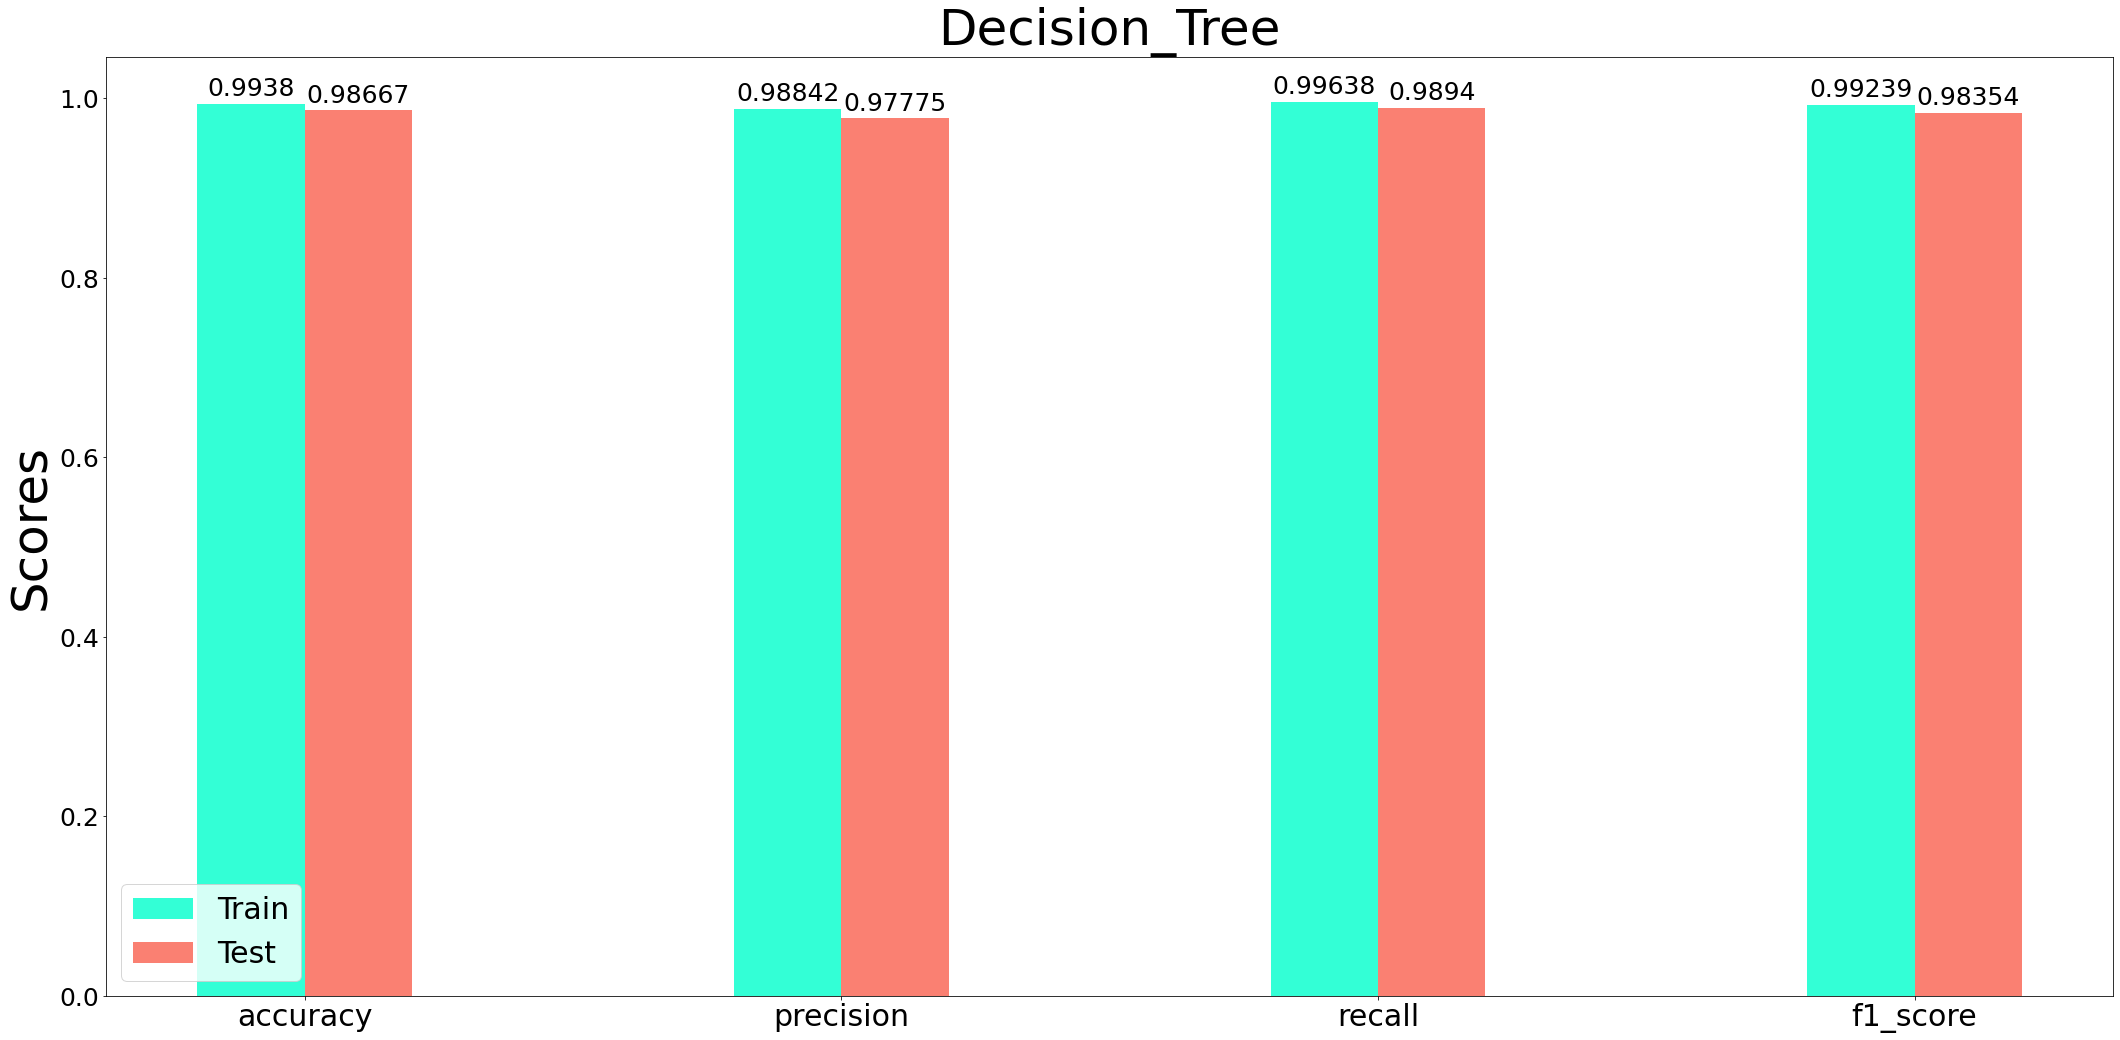

In [134]:
DT_train = []
DT_test = []

# train
DT_train.append(round(metrics.accuracy_score(y_train, DT_y_pred_train), 5))
DT_train.append(round(metrics.precision_score(y_train, DT_y_pred_train), 5))
DT_train.append(round(metrics.recall_score(y_train, DT_y_pred_train), 5))
DT_train.append(round(metrics.f1_score(y_train, DT_y_pred_train), 5))
# test
DT_test.append(round(metrics.accuracy_score(y_test, DT_y_pred_test), 5))
DT_test.append(round(metrics.precision_score(y_test, DT_y_pred_test), 5))
DT_test.append(round(metrics.recall_score(y_test, DT_y_pred_test), 5))
DT_test.append(round(metrics.f1_score(y_test, DT_y_pred_test), 5))
# plot
plotplot(category,DT_train,DT_test,'Decision_Tree','#33ffd6','salmon')

##### Compare models by accuracy

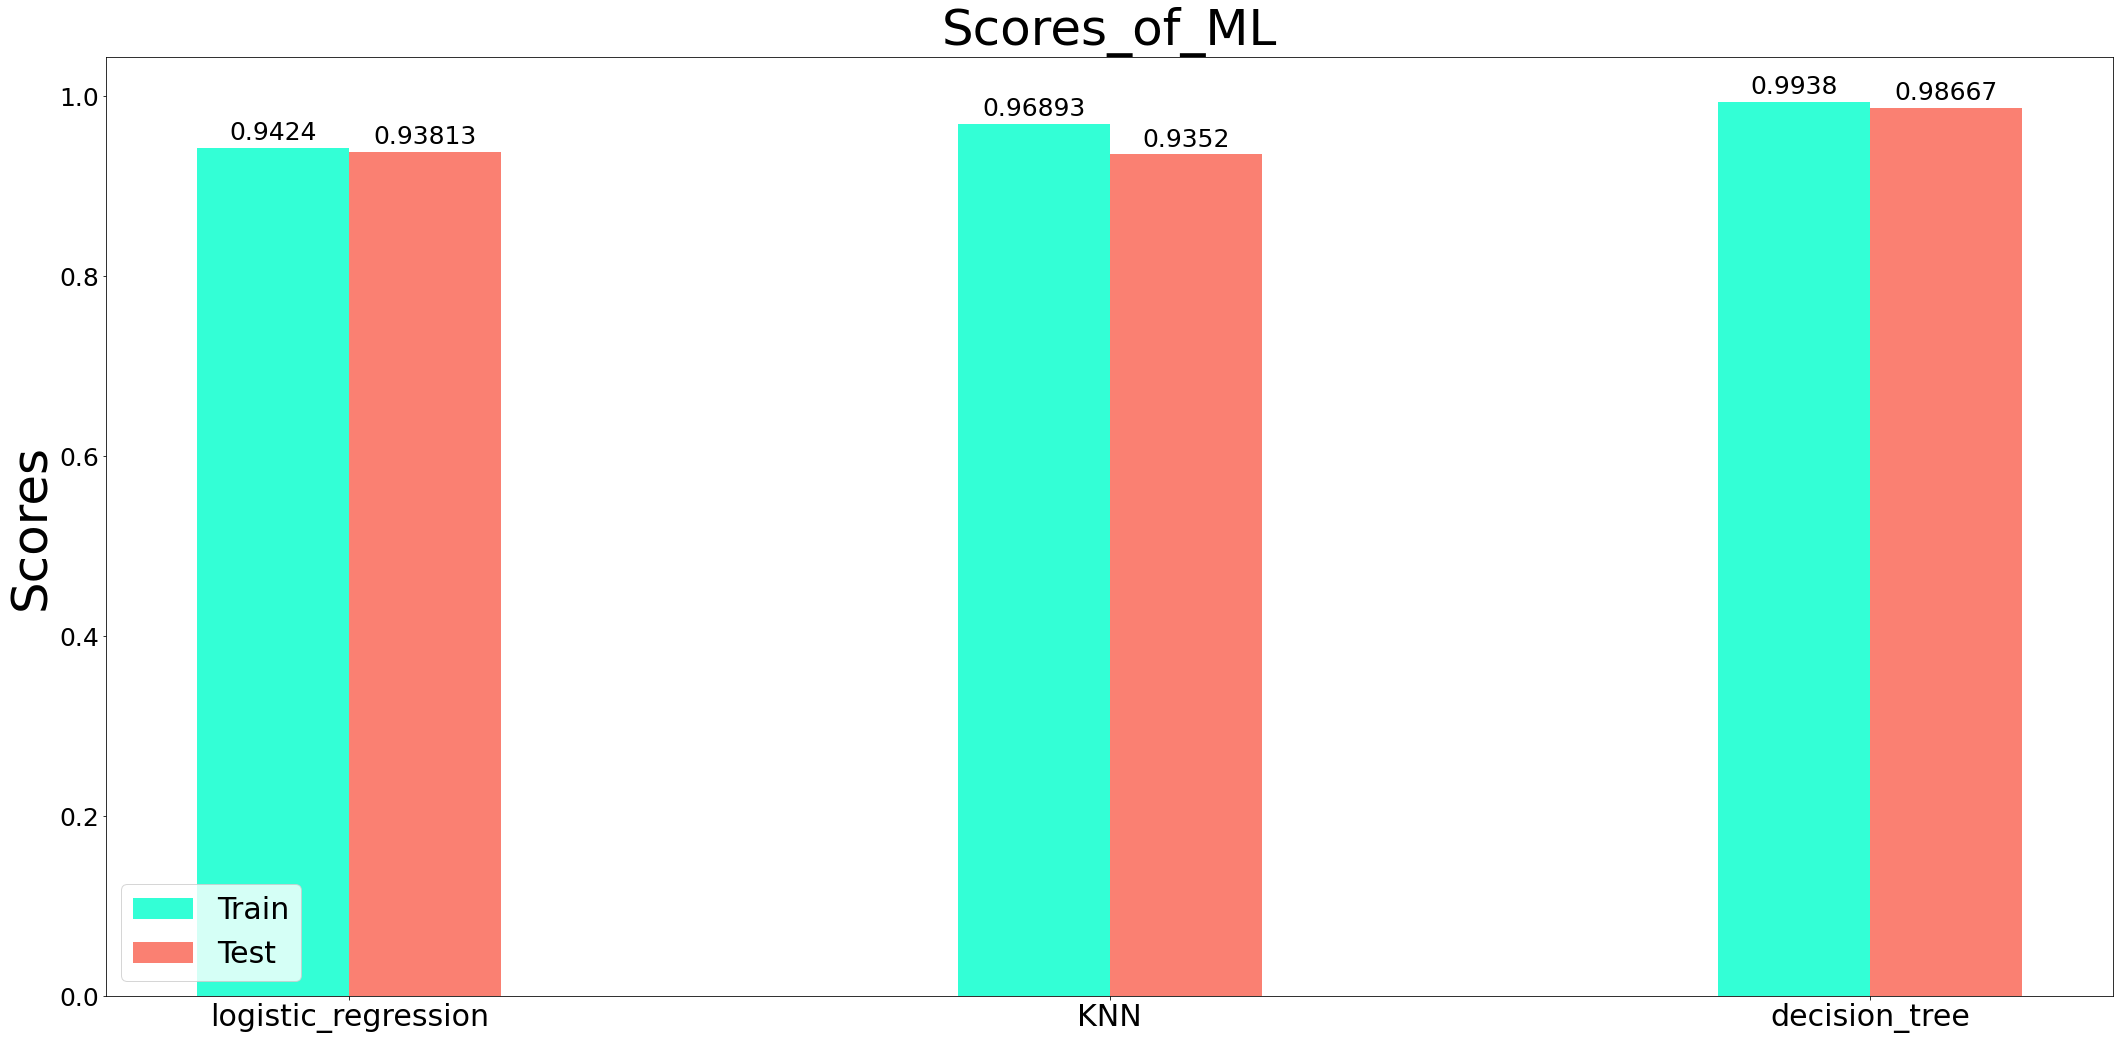

In [135]:
def plotplot(machine,train,test,name,color1,color2):
    
    font = {'size': 25}
    plt.rc('font', **font)

    x = np.arange(len(machine))  # the label locations
    width = 0.2  # the width of the bars

    fig, ax = plt.subplots(figsize=(30,15))
    rects1 = ax.bar(x - width/2, train, width, label='Train',color=color1)
    rects2 = ax.bar(x + width/2, test, width, label='Test',color=color2)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Scores',fontsize=50)
    ax.set_title(name,fontsize=50)
    ax.set_xticks(x)
    ax.set_xticklabels(machine,fontsize=30)
    ax.legend(fontsize=30,loc="lower left")


    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')


    autolabel(rects1)
    autolabel(rects2)

    fig.tight_layout()
    plt.show()
    
    
plotplot(machine,train,test,'Scores_of_ML','#33ffd6','salmon')

#### decision tree is the best modle so we will continue with him

## EU Model

In [136]:
df_ml_eu = df.copy()
df_ml_eu.drop(['na_sucsses','japan_sucsses','other_sucsses'],axis=1, inplace = True)
df_ml_eu

,developer,genre,na_sales,eu_sales,japan_sales,other_sales,release_year,platform_type,eu_sucsses
0,2574,7,0.414959,0.224365,0.004608,0.198718,2012,1,0
1,2588,7,0.195697,0.168528,0.004608,0.105769,2013,1,0
2,2588,7,0.102459,0.092386,0.004608,0.057692,2014,1,0
3,1089,7,0.148566,0.041624,0.004608,0.051282,2011,1,0
4,909,7,0.053279,0.049746,0.004608,0.064103,2015,1,0
...,...,...,...,...,...,...,...,...,...
18744,1050,0,0.000000,0.000000,0.004608,0.003205,2003,2,0
18745,710,0,0.001025,0.000000,0.004608,0.000000,2008,0,0
18746,1973,0,0.001025,0.000000,0.004608,0.003205,2003,0,0
18747,594,0,0.001025,0.000000,0.004608,0.003205,2012,1,0


In [137]:
X_train, X_test, y_train, y_test = split_train_and_test(df_ml_eu,'eu_sucsses')

In [138]:
scaler = StandardScaler()
X_scale_train = scaler.fit_transform(X_train)
X_scale_test = scaler.transform(X_test)

In [139]:
# Lists
category = ['accuracy','precision','recall','f1_score']
train = []
test = []

In [140]:
DT_clf = decision_tree(X_scale_train, y_train)

Best max depth is: 10 

Best min samples split: 5 



In [141]:
DT_y_pred_train = DT_clf.predict(X_scale_train)
train.append(round(metrics.accuracy_score(y_train, DT_y_pred_train), 5))
evo_met(y_train, DT_y_pred_train,'decision tree train')

confusion matrix of decision tree train is:



,Predicted Negative,Predicted Positive
Actual Negative,14164,12
Actual Positive,59,764


In [142]:
DT_y_pred_test = DT_clf.predict(X_scale_test)
test.append(round(metrics.accuracy_score(y_test, DT_y_pred_test), 5))
evo_met(y_test, DT_y_pred_test,'decision tree test')

confusion matrix of decision tree test is:



,Predicted Negative,Predicted Positive
Actual Negative,3515,13
Actual Positive,36,186


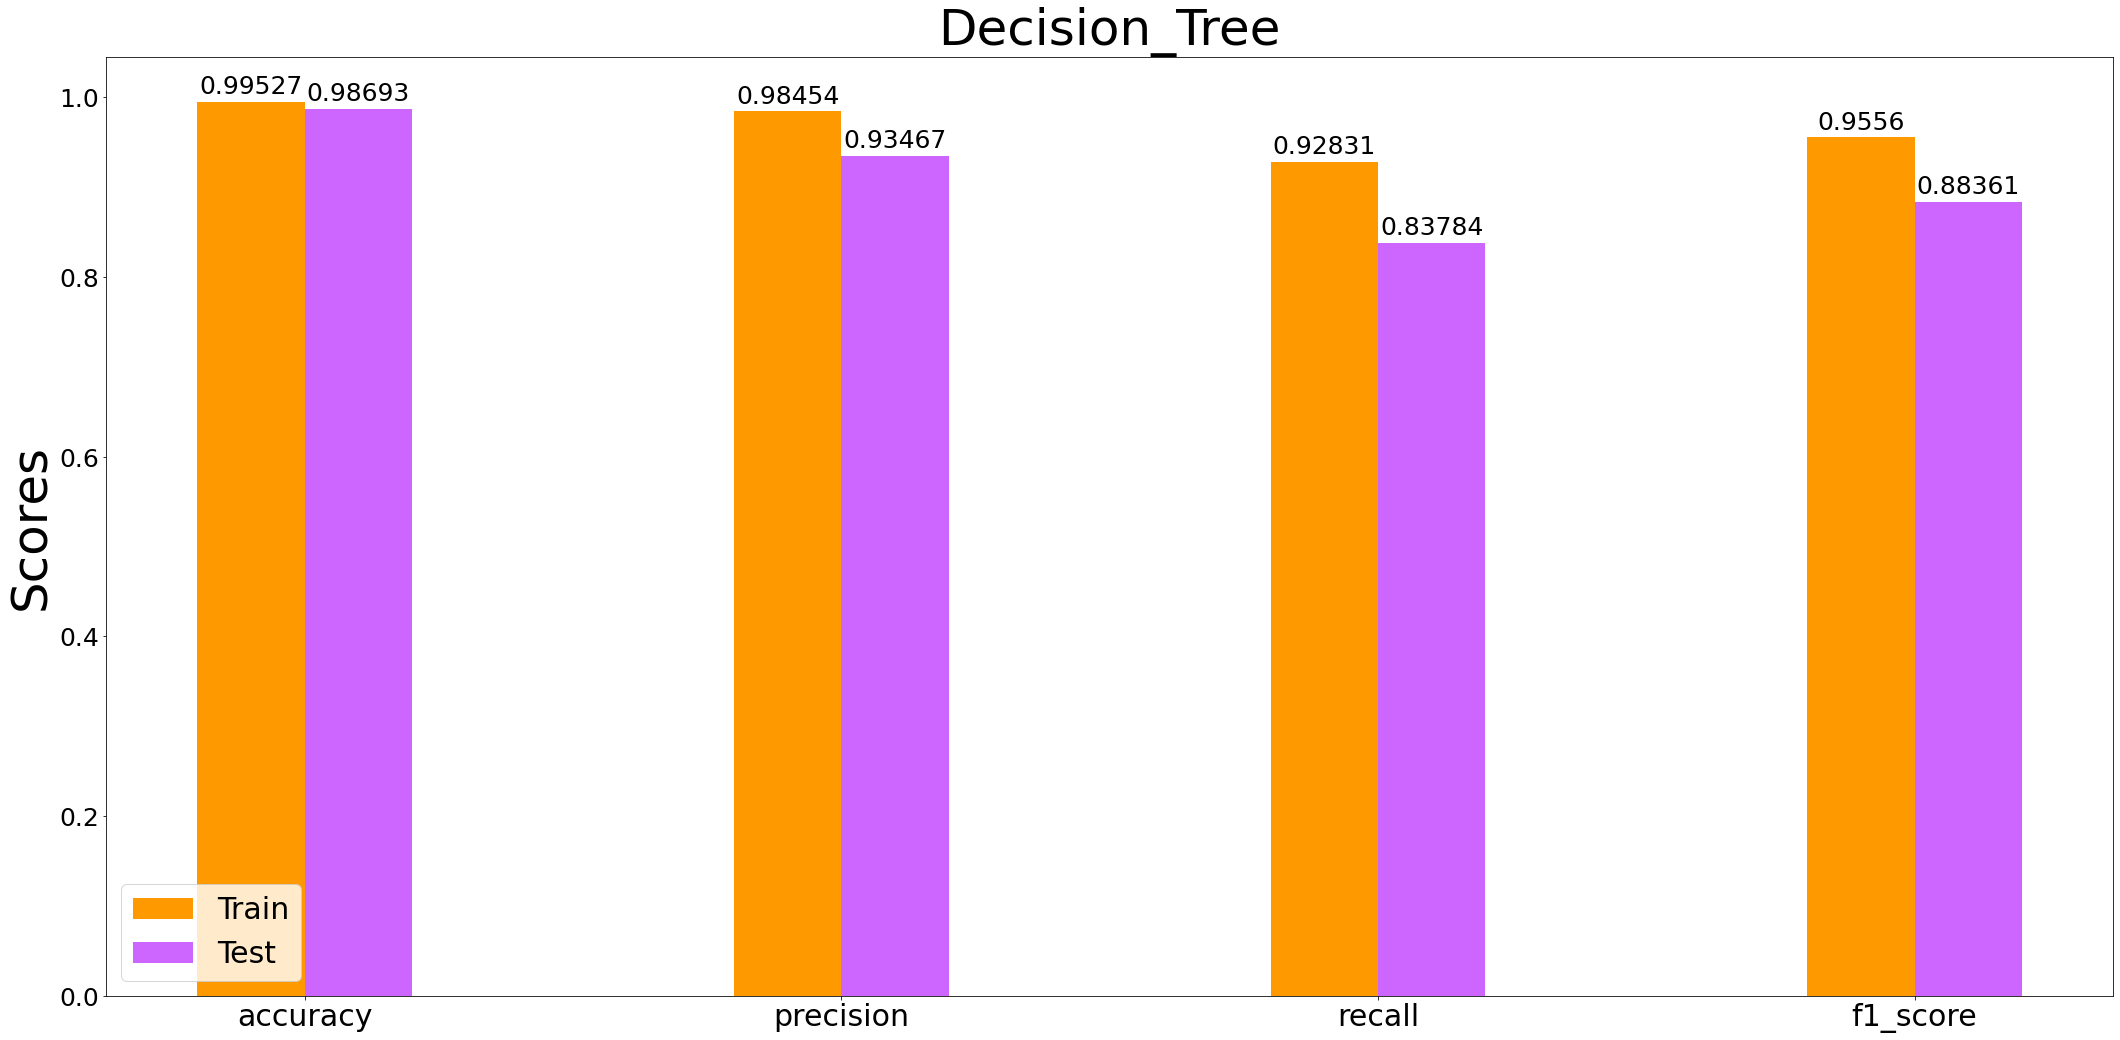

In [143]:
DT_train = []
DT_test = []

# train
DT_train.append(round(metrics.accuracy_score(y_train, DT_y_pred_train), 5))
DT_train.append(round(metrics.precision_score(y_train, DT_y_pred_train), 5))
DT_train.append(round(metrics.recall_score(y_train, DT_y_pred_train), 5))
DT_train.append(round(metrics.f1_score(y_train, DT_y_pred_train), 5))
# test
DT_test.append(round(metrics.accuracy_score(y_test, DT_y_pred_test), 5))
DT_test.append(round(metrics.precision_score(y_test, DT_y_pred_test), 5))
DT_test.append(round(metrics.recall_score(y_test, DT_y_pred_test), 5))
DT_test.append(round(metrics.f1_score(y_test, DT_y_pred_test), 5))
# plot
plotplot(category,DT_train,DT_test,'Decision_Tree','#ff9900','#cc66ff')

## Japan Model

In [144]:
df_ml_jp = df.copy()
df_ml_jp.drop(['na_sucsses','eu_sucsses','other_sucsses'],axis=1, inplace = True)
df_ml_jp

,developer,genre,na_sales,eu_sales,japan_sales,other_sales,release_year,platform_type,japan_sucsses
0,2574,7,0.414959,0.224365,0.004608,0.198718,2012,1,0
1,2588,7,0.195697,0.168528,0.004608,0.105769,2013,1,0
2,2588,7,0.102459,0.092386,0.004608,0.057692,2014,1,0
3,1089,7,0.148566,0.041624,0.004608,0.051282,2011,1,0
4,909,7,0.053279,0.049746,0.004608,0.064103,2015,1,0
...,...,...,...,...,...,...,...,...,...
18744,1050,0,0.000000,0.000000,0.004608,0.003205,2003,2,1
18745,710,0,0.001025,0.000000,0.004608,0.000000,2008,0,1
18746,1973,0,0.001025,0.000000,0.004608,0.003205,2003,0,1
18747,594,0,0.001025,0.000000,0.004608,0.003205,2012,1,1


In [145]:
X_train, X_test, y_train, y_test = split_train_and_test(df_ml_jp,'japan_sucsses')

In [146]:
scaler = StandardScaler()
X_scale_train = scaler.fit_transform(X_train)
X_scale_test = scaler.transform(X_test)

In [147]:
# Lists
category = ['accuracy','precision','recall','f1_score']
train = []
test = []

In [148]:
DT_clf = decision_tree(X_scale_train, y_train)

Best max depth is: 8 

Best min samples split: 5 



In [149]:
DT_y_pred_train = DT_clf.predict(X_scale_train)
train.append(round(metrics.accuracy_score(y_train, DT_y_pred_train), 5))
evo_met(y_train, DT_y_pred_train,'decision tree train')

confusion matrix of decision tree train is:



,Predicted Negative,Predicted Positive
Actual Negative,7714,6
Actual Positive,3,7276


In [150]:
DT_y_pred_test = DT_clf.predict(X_scale_test)
test.append(round(metrics.accuracy_score(y_test, DT_y_pred_test), 5))
evo_met(y_test, DT_y_pred_test,'decision tree test')

confusion matrix of decision tree test is:



,Predicted Negative,Predicted Positive
Actual Negative,1938,6
Actual Positive,4,1802


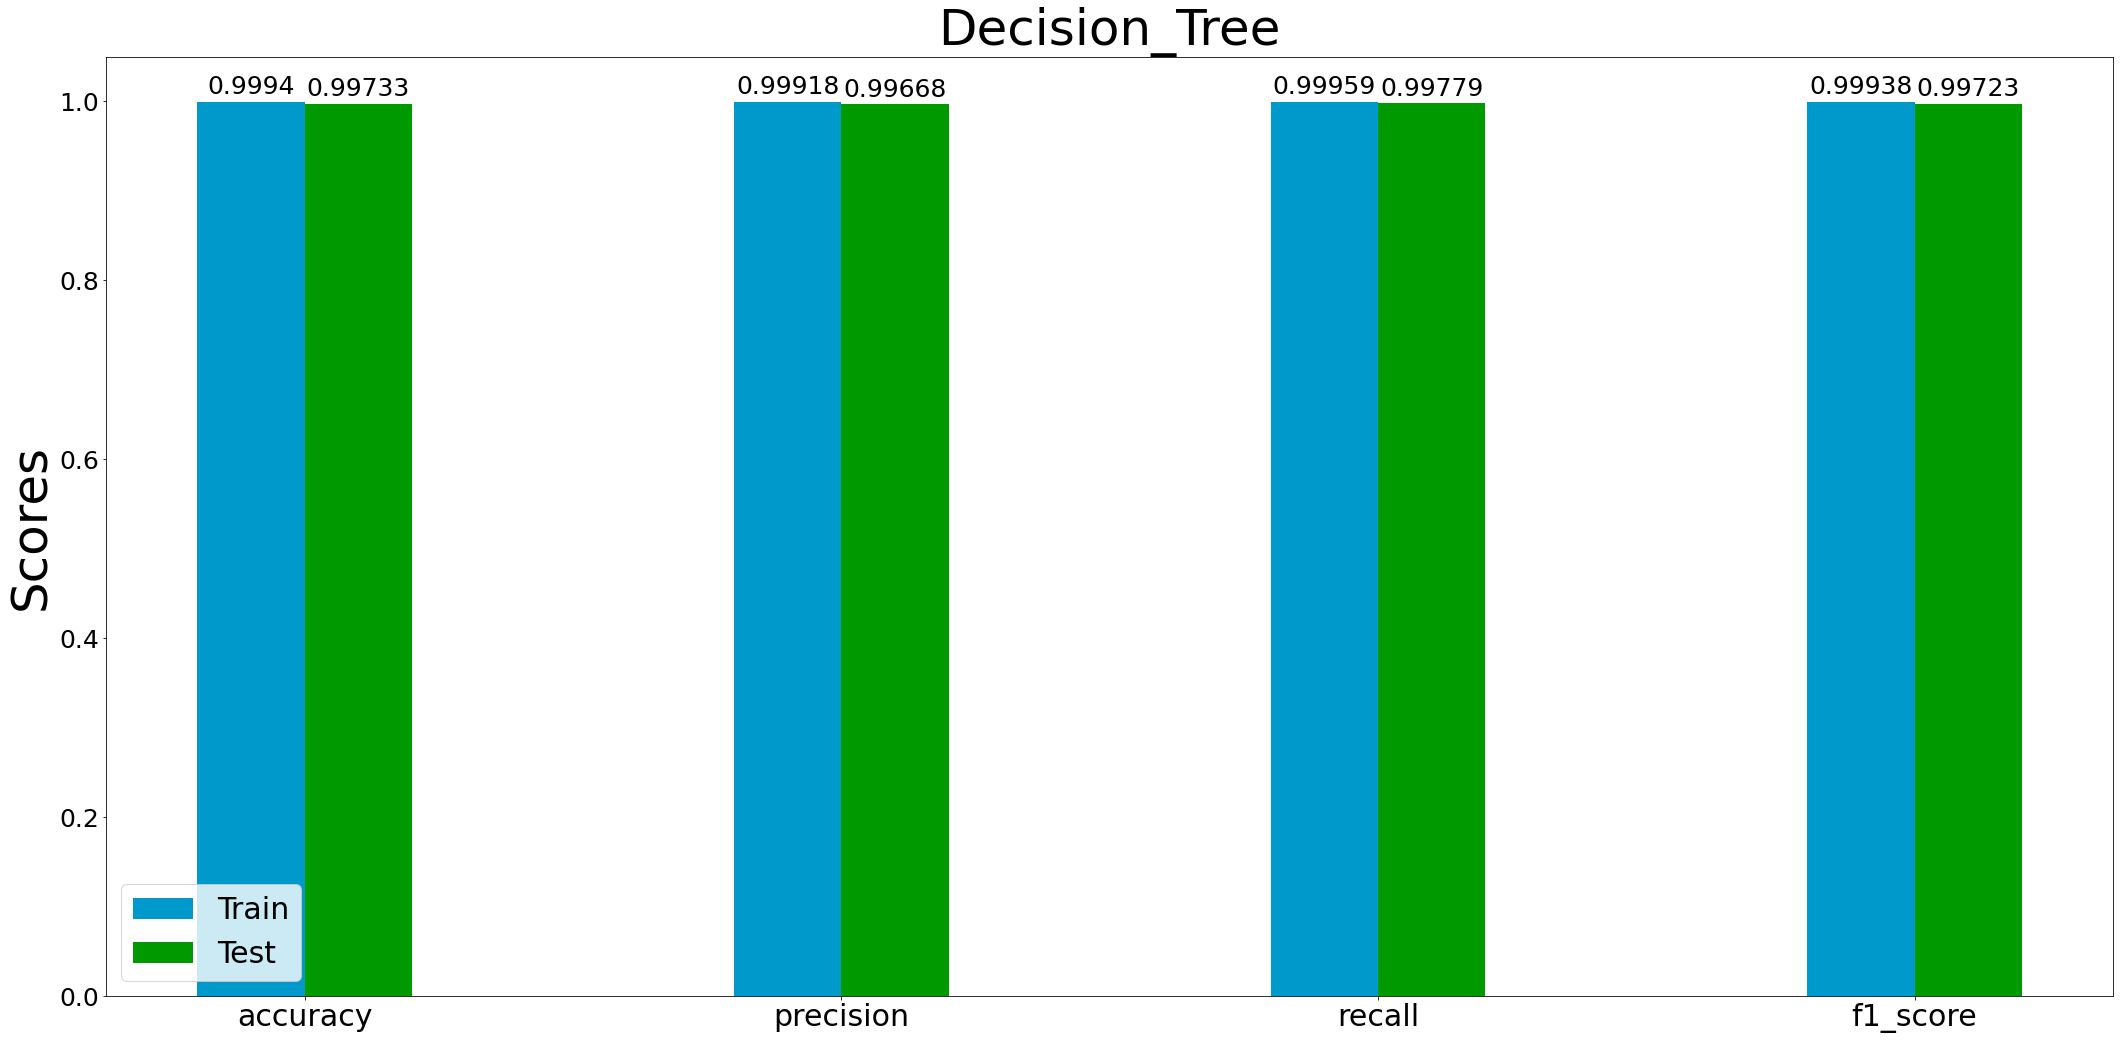

In [151]:
DT_train = []
DT_test = []

# train
DT_train.append(round(metrics.accuracy_score(y_train, DT_y_pred_train), 5))
DT_train.append(round(metrics.precision_score(y_train, DT_y_pred_train), 5))
DT_train.append(round(metrics.recall_score(y_train, DT_y_pred_train), 5))
DT_train.append(round(metrics.f1_score(y_train, DT_y_pred_train), 5))
# test
DT_test.append(round(metrics.accuracy_score(y_test, DT_y_pred_test), 5))
DT_test.append(round(metrics.precision_score(y_test, DT_y_pred_test), 5))
DT_test.append(round(metrics.recall_score(y_test, DT_y_pred_test), 5))
DT_test.append(round(metrics.f1_score(y_test, DT_y_pred_test), 5))
# plot
plotplot(category,DT_train,DT_test,'Decision_Tree','#0099cc','#009900')

## Other Model

In [152]:
df_ml_other = df.copy()
df_ml_other.drop(['na_sucsses','eu_sucsses','japan_sucsses'],axis=1, inplace = True)
df_ml_other

,developer,genre,na_sales,eu_sales,japan_sales,other_sales,release_year,platform_type,other_sucsses
0,2574,7,0.414959,0.224365,0.004608,0.198718,2012,1,0
1,2588,7,0.195697,0.168528,0.004608,0.105769,2013,1,0
2,2588,7,0.102459,0.092386,0.004608,0.057692,2014,1,0
3,1089,7,0.148566,0.041624,0.004608,0.051282,2011,1,0
4,909,7,0.053279,0.049746,0.004608,0.064103,2015,1,1
...,...,...,...,...,...,...,...,...,...
18744,1050,0,0.000000,0.000000,0.004608,0.003205,2003,2,0
18745,710,0,0.001025,0.000000,0.004608,0.000000,2008,0,0
18746,1973,0,0.001025,0.000000,0.004608,0.003205,2003,0,0
18747,594,0,0.001025,0.000000,0.004608,0.003205,2012,1,0


In [153]:
X_train, X_test, y_train, y_test = split_train_and_test(df_ml_other,'other_sucsses')

In [154]:
scaler = StandardScaler()
X_scale_train = scaler.fit_transform(X_train)
X_scale_test = scaler.transform(X_test)

In [155]:
# Lists
category = ['accuracy','precision','recall','f1_score']
train = []
test = []

In [156]:
DT_clf = decision_tree(X_scale_train, y_train)

Best max depth is: 10 

Best min samples split: 5 



In [157]:
DT_y_pred_train = DT_clf.predict(X_scale_train)
train.append(round(metrics.accuracy_score(y_train, DT_y_pred_train), 5))
evo_met(y_train, DT_y_pred_train,'decision tree train')

confusion matrix of decision tree train is:



,Predicted Negative,Predicted Positive
Actual Negative,14154,30
Actual Positive,17,798


In [158]:
DT_y_pred_test = DT_clf.predict(X_scale_test)
test.append(round(metrics.accuracy_score(y_test, DT_y_pred_test), 5))
evo_met(y_test, DT_y_pred_test,'decision tree test')

confusion matrix of decision tree test is:



,Predicted Negative,Predicted Positive
Actual Negative,3521,17
Actual Positive,15,197


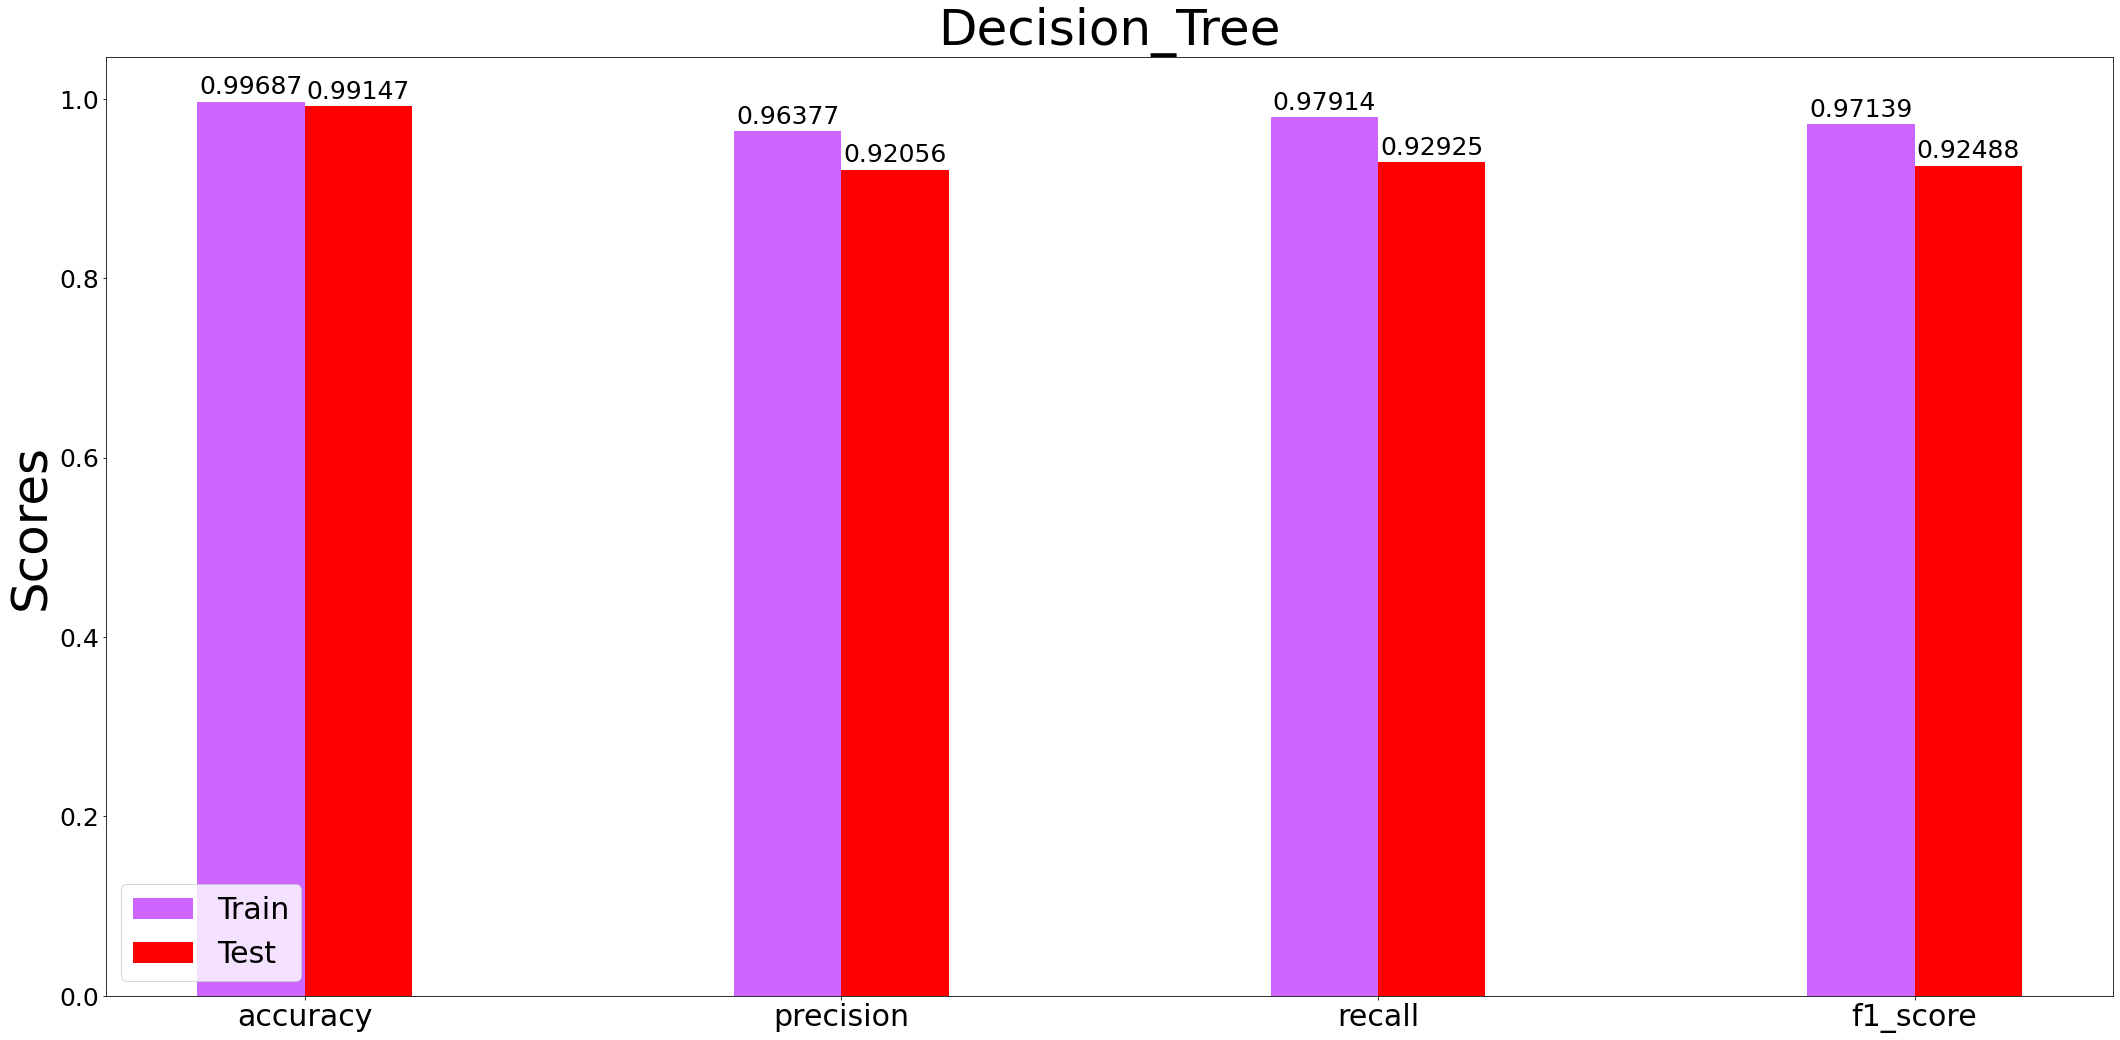

In [159]:
DT_train = []
DT_test = []

# train
DT_train.append(round(metrics.accuracy_score(y_train, DT_y_pred_train), 5))
DT_train.append(round(metrics.precision_score(y_train, DT_y_pred_train), 5))
DT_train.append(round(metrics.recall_score(y_train, DT_y_pred_train), 5))
DT_train.append(round(metrics.f1_score(y_train, DT_y_pred_train), 5))
# test
DT_test.append(round(metrics.accuracy_score(y_test, DT_y_pred_test), 5))
DT_test.append(round(metrics.precision_score(y_test, DT_y_pred_test), 5))
DT_test.append(round(metrics.recall_score(y_test, DT_y_pred_test), 5))
DT_test.append(round(metrics.f1_score(y_test, DT_y_pred_test), 5))
# plot
plotplot(category,DT_train,DT_test,'Decision_Tree','#cc66ff','#ff0000')